Write a program to perform high-pass filtering in frequency domain.

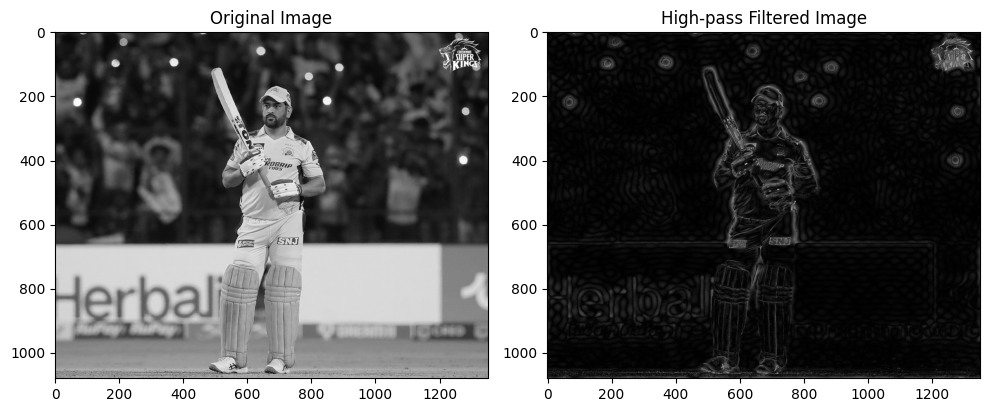

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def apply_high_pass_filter(image, cutoff_frequency):
    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image shape
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a mask with high-pass characteristics
    mask = np.zeros((rows, cols), np.uint8)
    r = cutoff_frequency  # radius
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 > r*r
    mask[mask_area] = 1

    # Apply the mask to the Fourier Transform
    f_transform_shifted *= mask

    # Perform Inverse Fourier Transform
    result_image = np.fft.ifft2(np.fft.ifftshift(f_transform_shifted))
    result_image = np.abs(result_image)

    return result_image

# Read the original image
image_path = r'C:\Users\Suyash Tambe\Desktop\FIPL ESE\20230418_102332.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the cutoff frequency (adjust as needed)
cutoff_frequency = 30

# Apply high-pass filter
high_pass_image = apply_high_pass_filter(original_image, cutoff_frequency)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(high_pass_image, cmap='gray')
plt.title('High-pass Filtered Image')

plt.tight_layout()
plt.show()
